### Lead Scoring Case Study

Identification of Hot Leads to focus more on them and thus enhancing the conversion ratio

#### Business Objective

We are required to categorize or cluster the leads as hot leads and cold leads. This is to be done by analysing past data provided by X Education Company. The Company's employee will then focus on communicating effictively with the hot leads so that most of them actually convert. We have been given a target of 80% convertion rate, and thus, in order to achieve that, we must accurately categorize the leads.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

###  Reading and Understanding the Data

In [3]:
# Read the data

Education_Lead_data = pd.read_csv(r"C:\Users\neeth\Upgrad\Machine_Learning/Lead_Scoring_Assignment/Leads.csv")
Education_Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Analyze the dataframe 

In [4]:
# Shape of the dataset

Education_Lead_data.shape

(9240, 37)

In [5]:
#checking for datatypes of columns

Education_Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Inspect the various aspects of the Bike_sharing dataframe using describe

Education_Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking for Duplicates

Education_Lead_data.duplicated().sum()

0

This shows that there are no duplicate values in our dataset

### Data Cleaning

In [8]:
# Dropping Lead Number and Prospect ID since they have all unique values

Education_Lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# Replacing the value, 'Select', with NAN

Education_Lead_data = Education_Lead_data.replace('Select', np.nan)
Education_Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Checking the total number of unique values in each column

Education_Lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [11]:
# Dropping unique valued columns

Education_Lead_data = Education_Lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
Education_Lead_data.shape

(9240, 30)

### Inspecting the missing values

In [12]:
#checking null values in each rows

Education_Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [13]:
# Checking the percentage of missing values

round(100*(Education_Lead_data.isnull().sum()/len(Education_Lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

###### Removing those columns that have more than 45 % null values

In [14]:
#Dropping cols with more than 45% missing values

cols=Education_Lead_data.columns

for i in cols:
    if((100*(Education_Lead_data[i].isnull().sum()/len(Education_Lead_data.index))) >= 45):
        Education_Lead_data.drop(i, 1, inplace = True)

In [15]:
# Shape of the dataset

Education_Lead_data.shape

(9240, 23)

In [16]:
# Checking the percentage (%) of null values

round(100*(Education_Lead_data.isnull().sum())/len(Education_Lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

The above list shows that there are huge value of null values in some columns.
But removing these rows with the null values will cost us huge data loss. 
As these columns are important, we are going to replace the null values with 'not provided'. 
By this way, we will have all the data with mimimal null values. 
In case if these 'not provided' come up in the model, it will be of no use and later we can drop them off.

In [17]:
Education_Lead_data['Country'] = Education_Lead_data['Country'].fillna('not provided')
Education_Lead_data['Specialization'] = Education_Lead_data['Specialization'].fillna('not provided')
Education_Lead_data['What is your current occupation'] = Education_Lead_data['What is your current occupation'].fillna('not provided')
Education_Lead_data['What matters most to you in choosing a course'] = Education_Lead_data['What matters most to you in choosing a course'].fillna('not provided')
Education_Lead_data['Tags'] = Education_Lead_data['Tags'].fillna('not provided')
Education_Lead_data['City'] = Education_Lead_data['City'].fillna('not provided')
Education_Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [18]:
# Checking the percentage (%) of null values

round(100*(Education_Lead_data.isnull().sum())/len(Education_Lead_data.index),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [19]:
Education_Lead_data.shape

(9240, 23)

## EDA (Exploratory Data Analysis)

#### Analysing the categorical columns

In [20]:
# To familiarize all the categorical values

for column in Education_Lead_data:
    print(Education_Lead_data[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: i

In [21]:
# Inspecting the column 'Country'

Education_Lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Ghana                      2
Belgium                    2
Philippines                2
China                      2
Uganda                     2
Italy                      2
Vietnam                    1
Sri Lanka                  1
Denmark                    1
Switzerland                1
Russia                     1
Indonesia     

In [22]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Education_Lead_data['Country'] = Education_Lead_data.apply(lambda x:slots(x['Country']), axis = 1)
Education_Lead_data['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

Text(0.5, 1.0, 'Country')

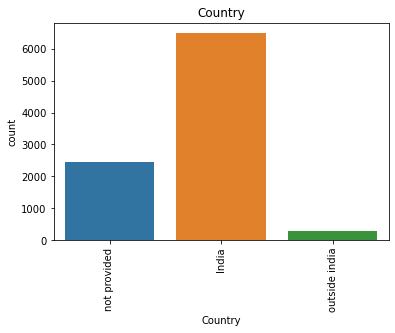

In [23]:
#Visualizing the variable, Country

sns.countplot(Education_Lead_data['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

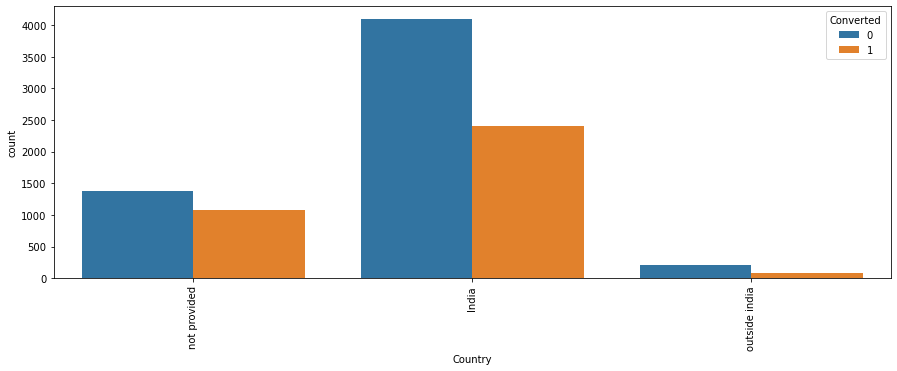

In [24]:
#visualizing count of Variable, Country based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(Education_Lead_data.Country, hue = Education_Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

Education_Lead_data['Country'] = Education_Lead_data['Country'].replace('not provided','India')
Education_Lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [26]:
# Checking the percent of lose if the null values are removed

round(100*(sum(Education_Lead_data.isnull().sum(axis=1) > 1)/Education_Lead_data.shape[0]),2)

1.48

In [27]:
# Copying those columns where the null values are < 1 or =0

Education_Lead_data = Education_Lead_data[Education_Lead_data.isnull().sum(axis=1) <1]

In [28]:
# Rechecking the percentage of missing values

round(100*(Education_Lead_data.isnull().sum()/len(Education_Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [29]:
#  Shape of the dataset

Education_Lead_data.shape

(9074, 23)

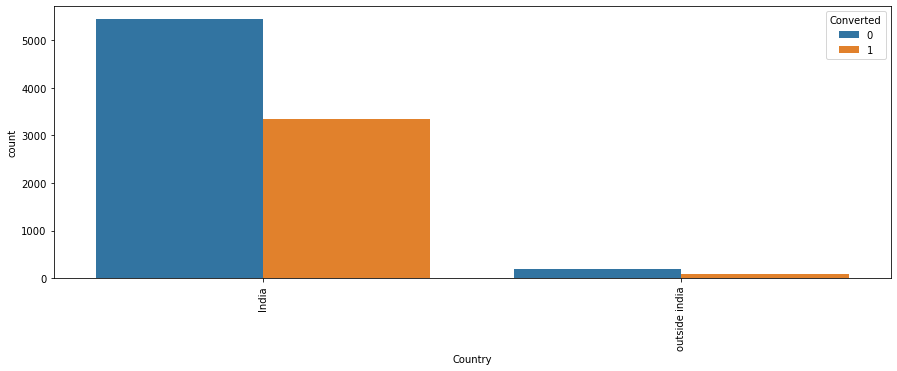

In [30]:
# Plotting spread of Country columnn after replacing 'not provided' values

plt.figure(figsize=(15,5))
s1=sns.countplot(Education_Lead_data.Country, hue=Education_Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### As we can see the Number of Values for the column, 'India' are quite high (nearly 97% of the Data). Hence this column can be dropped.

In [31]:
# Creating a list of columns to be droppped

columns_to_drop=['Country']
columns_to_drop

['Country']

In [32]:
# Inspecting the column 'City'


Education_Lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

Text(0.5, 1.0, 'City')

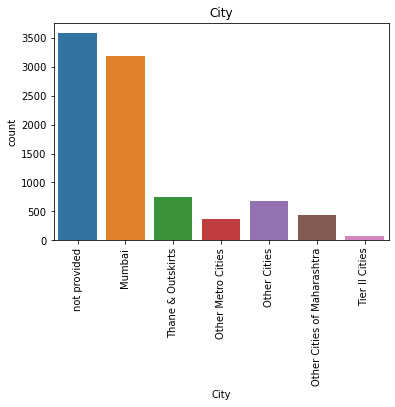

In [33]:
#visualizing count of Variable, City

sns.countplot(Education_Lead_data['City']).tick_params(axis='x', rotation = 90)
plt.title('City')

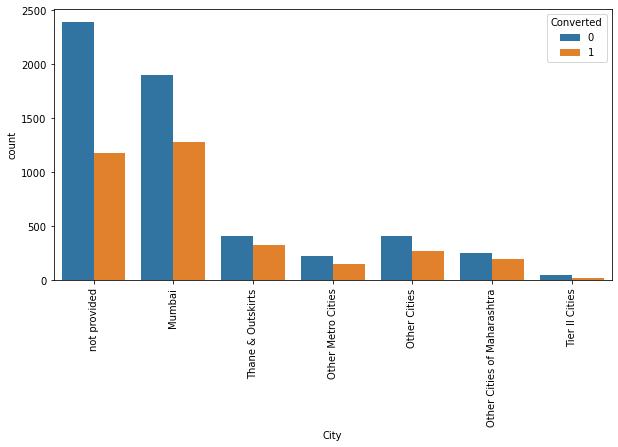

In [34]:
# Visualizing count of Variable, City based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(Education_Lead_data.City, hue=Education_Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

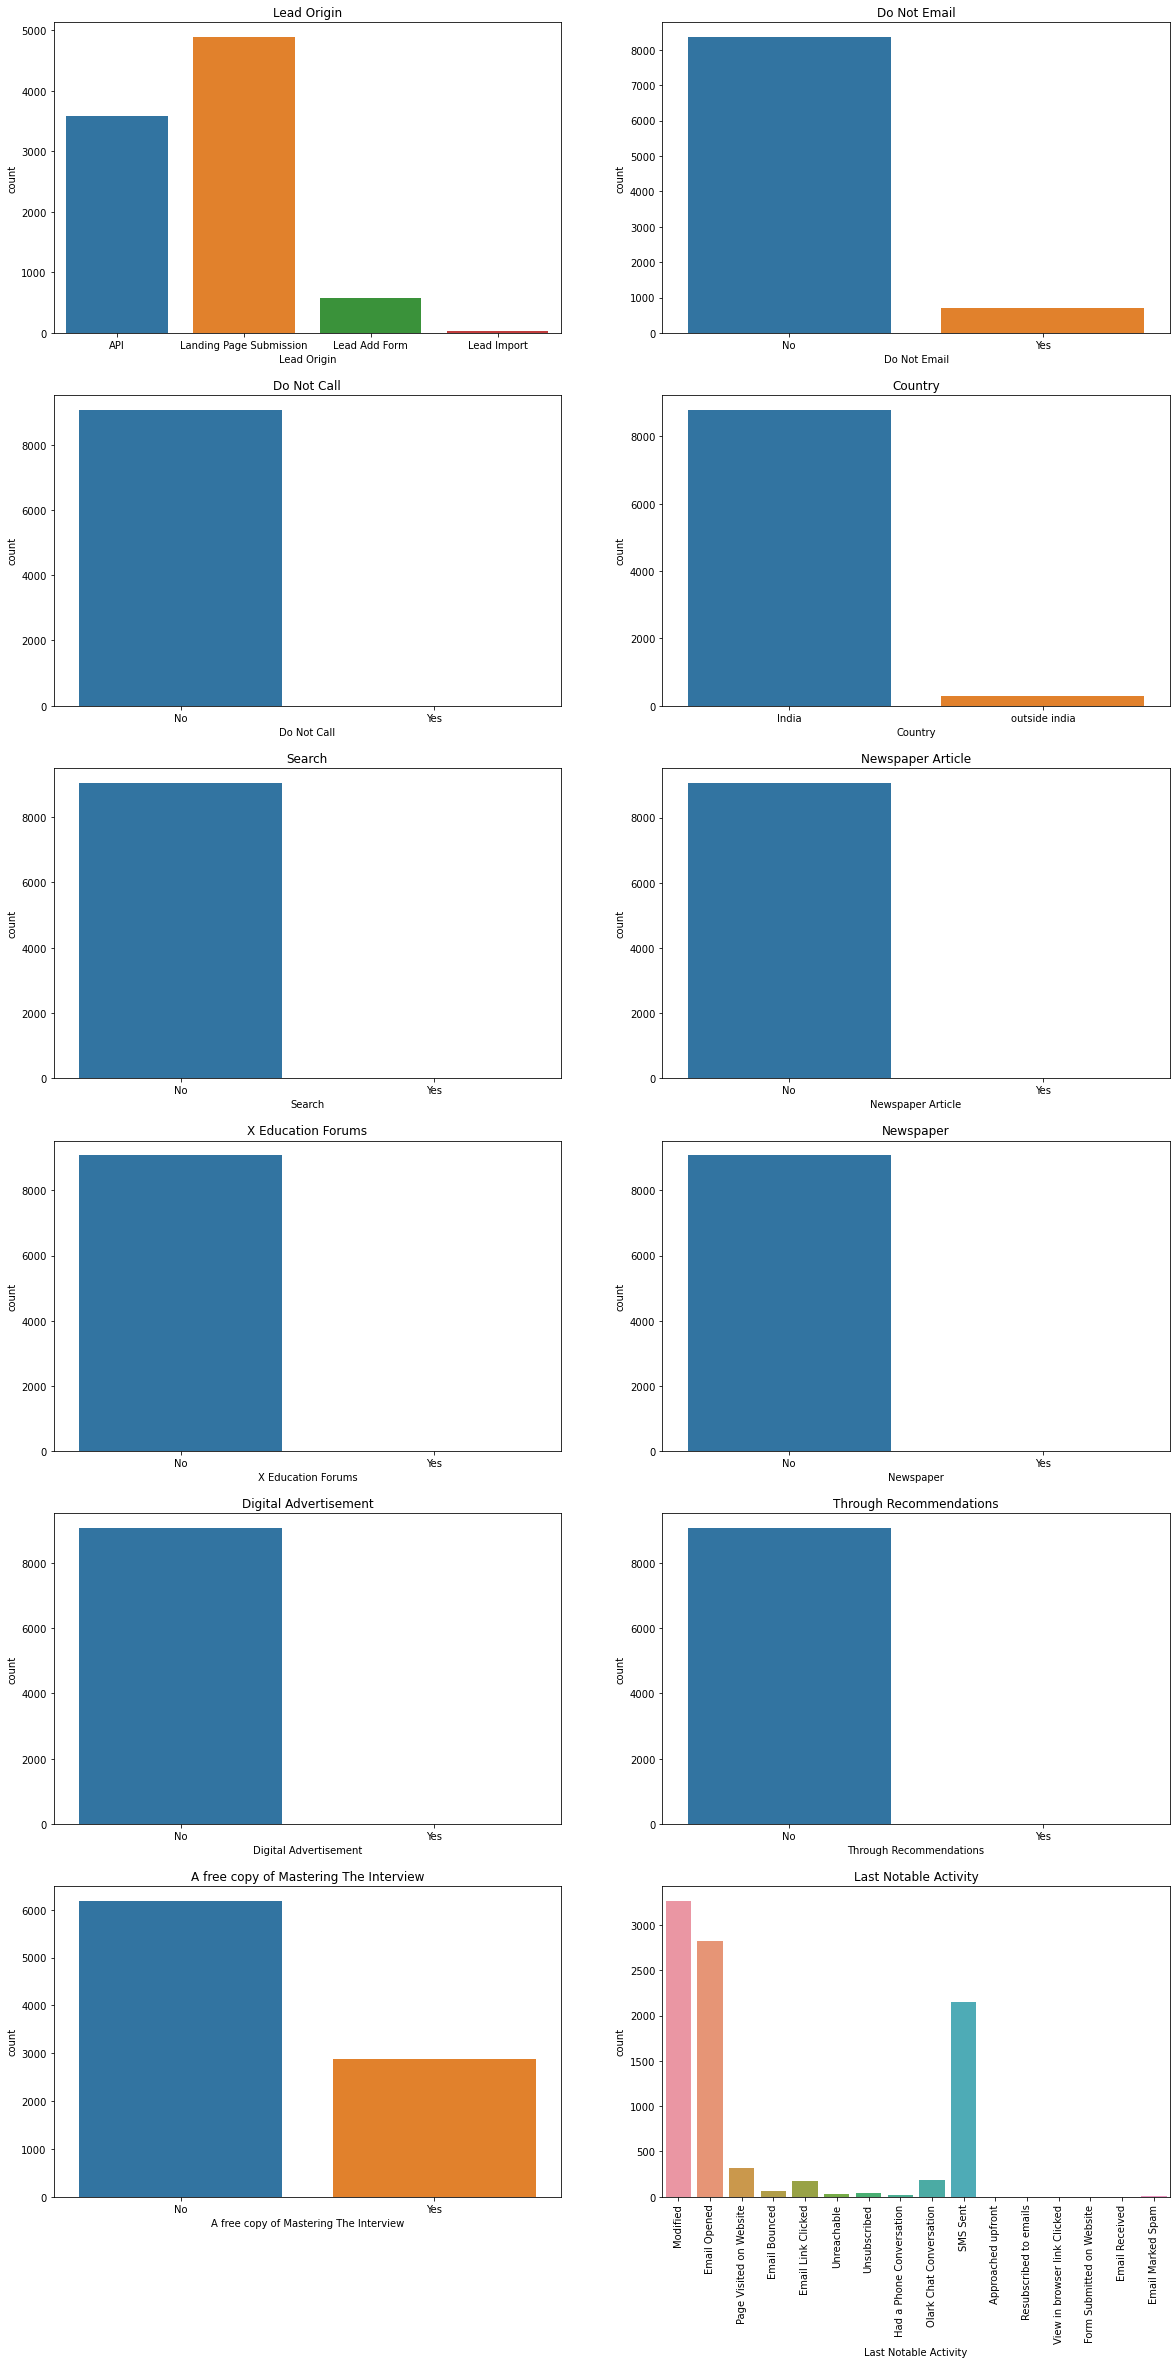

In [35]:
# Visualising the categorical variables

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Education_Lead_data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Education_Lead_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Education_Lead_data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Education_Lead_data['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Education_Lead_data['Search'])
plt.title('Search')
plt.subplot(6,2,6)
sns.countplot(Education_Lead_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Education_Lead_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Education_Lead_data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Education_Lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Education_Lead_data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Education_Lead_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Education_Lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

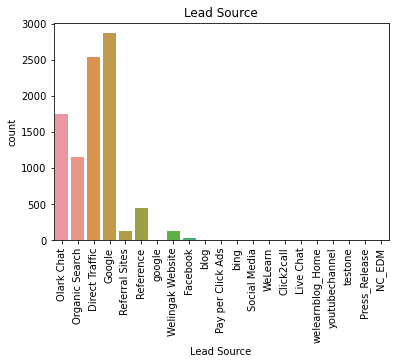

In [36]:
sns.countplot(Education_Lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

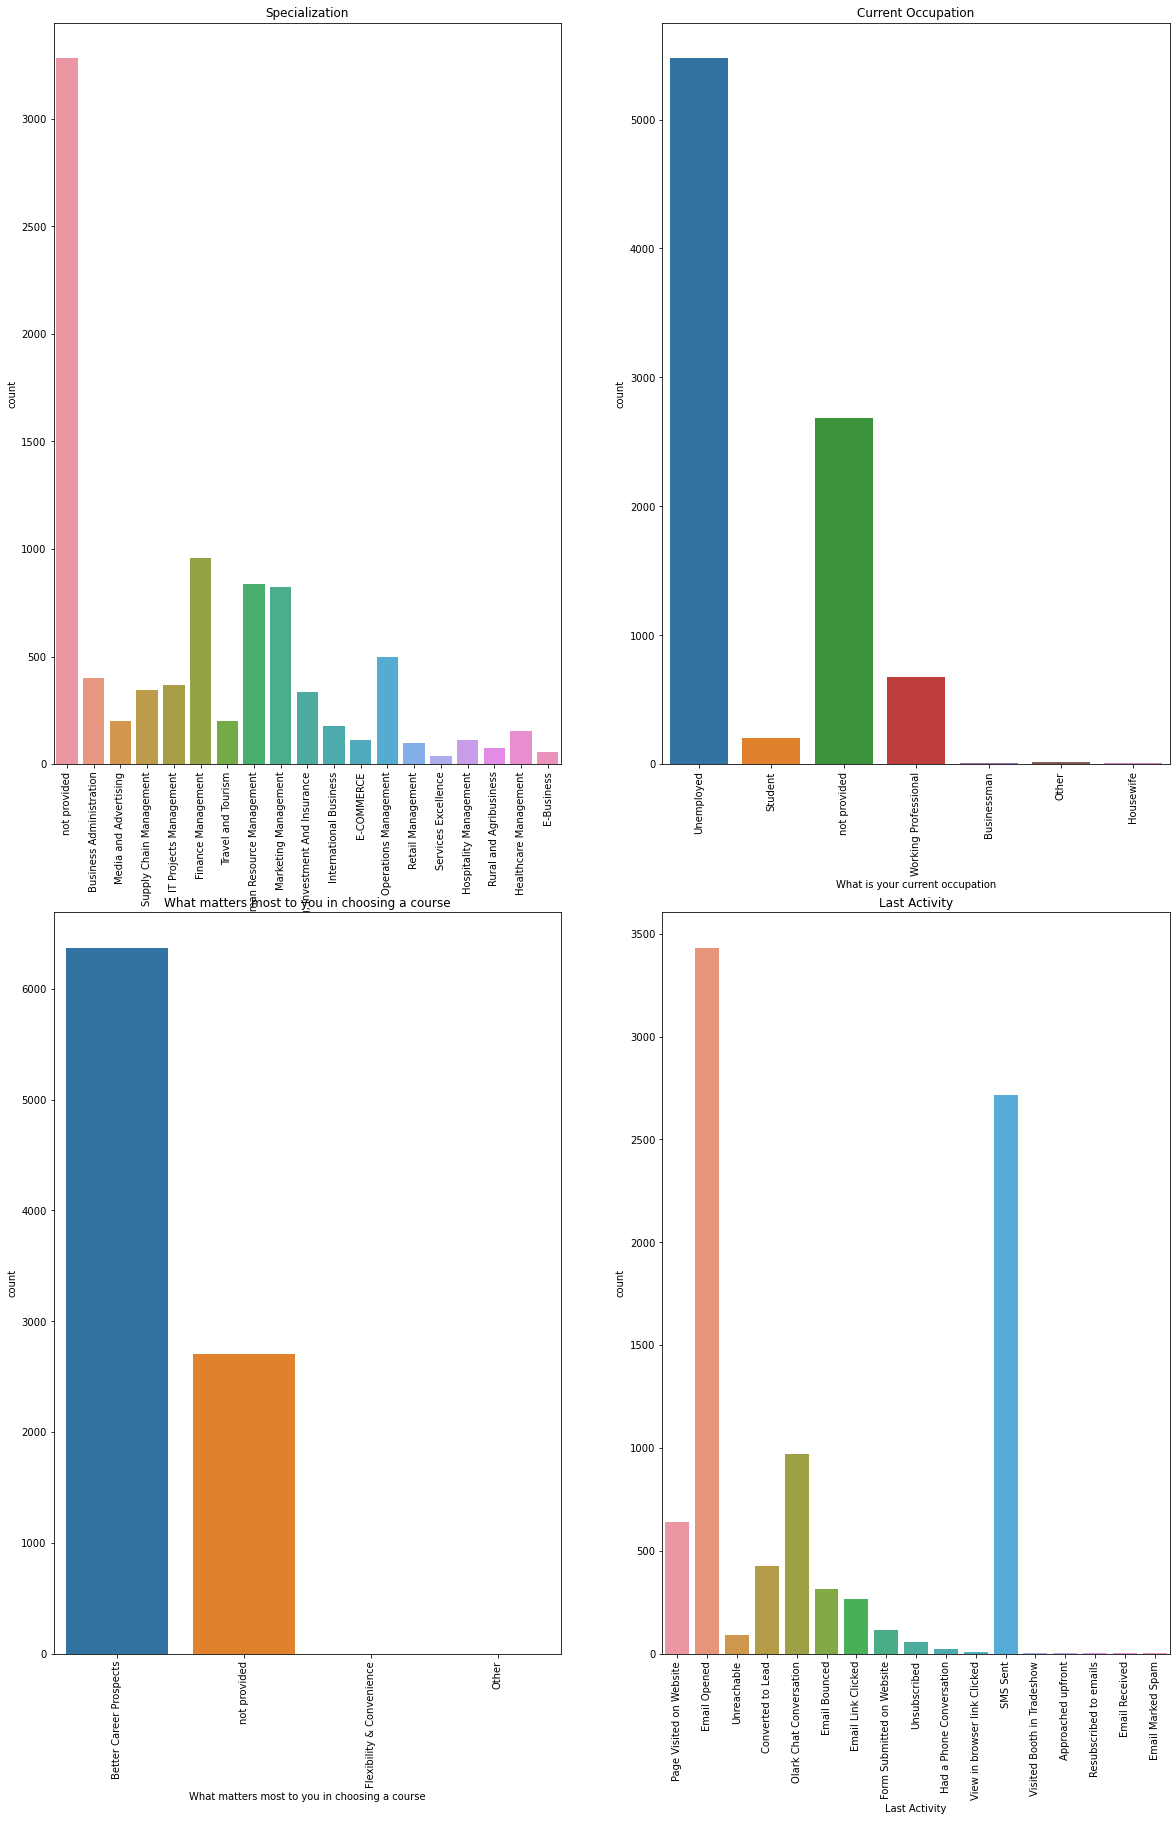

In [37]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Education_Lead_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Education_Lead_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Education_Lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Education_Lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

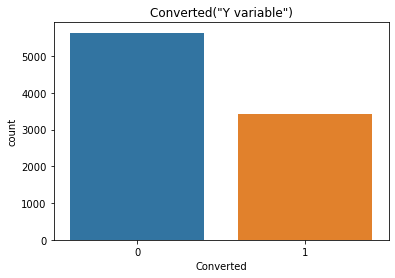

In [38]:
sns.countplot(Education_Lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Visualising Numeric Variables
##### Let's make histogram of all the numeric variables

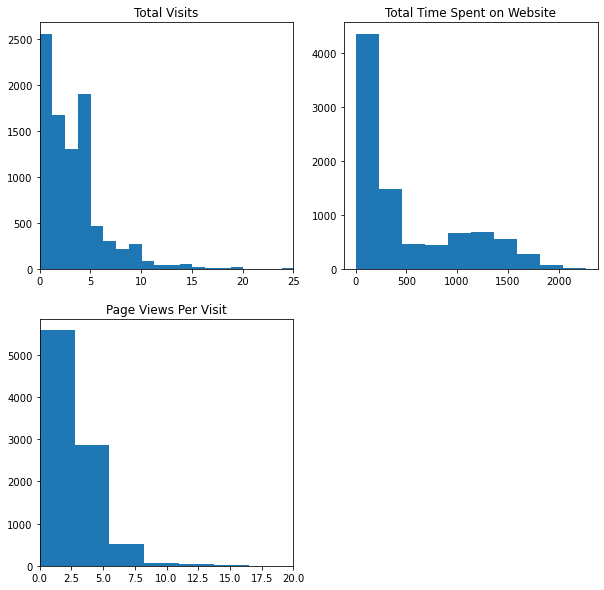

In [39]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Education_Lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Education_Lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Education_Lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )  

#### Visualizing Categorical Variable based on Converted value

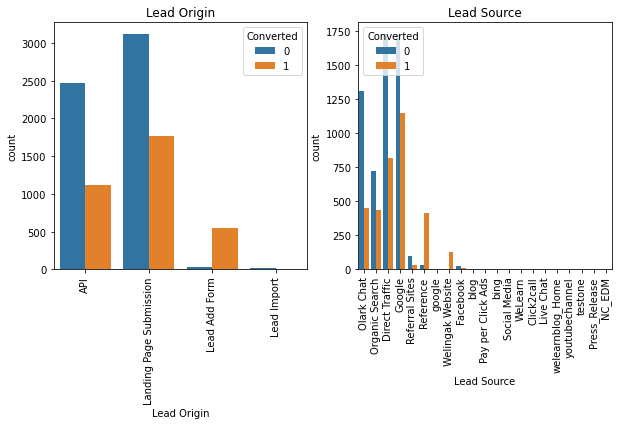

In [40]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

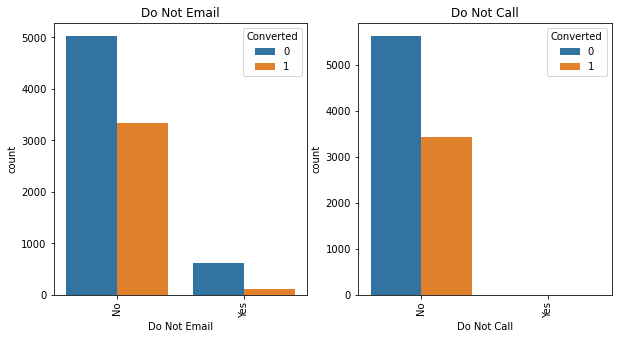

In [41]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

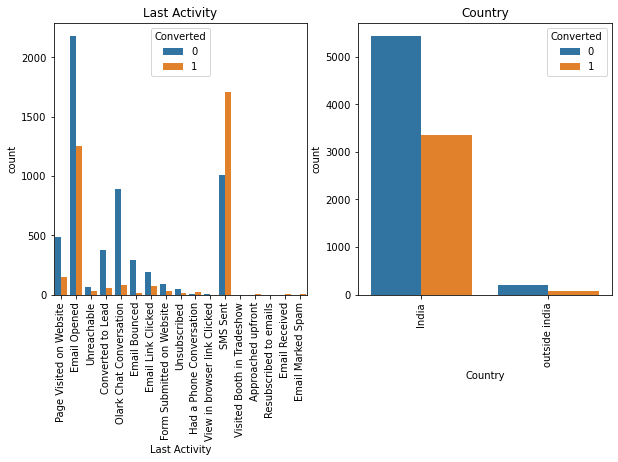

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

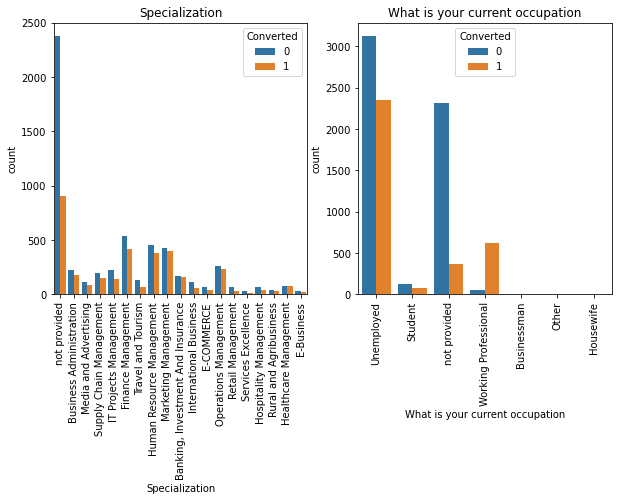

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

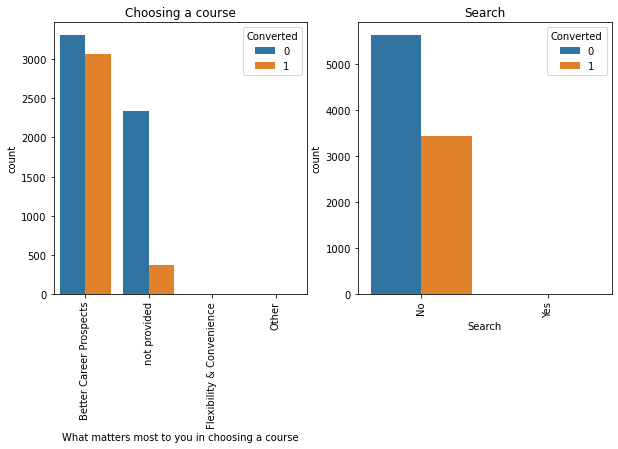

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

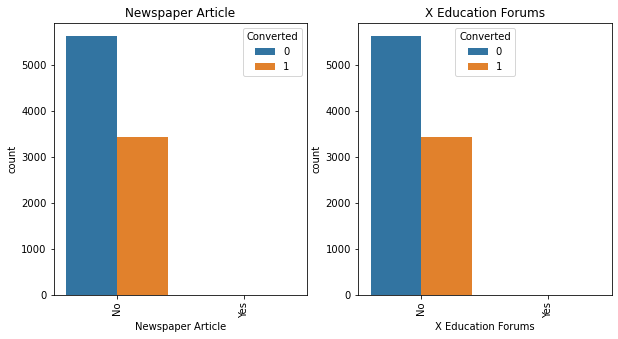

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

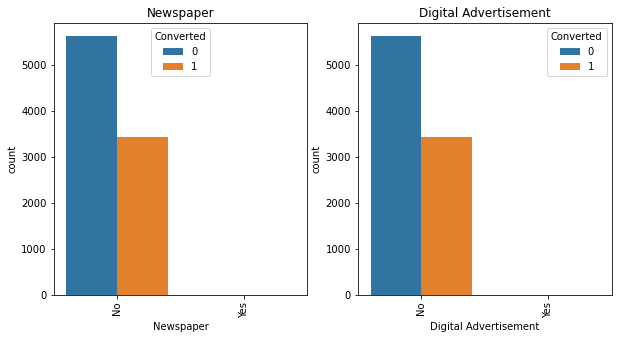

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

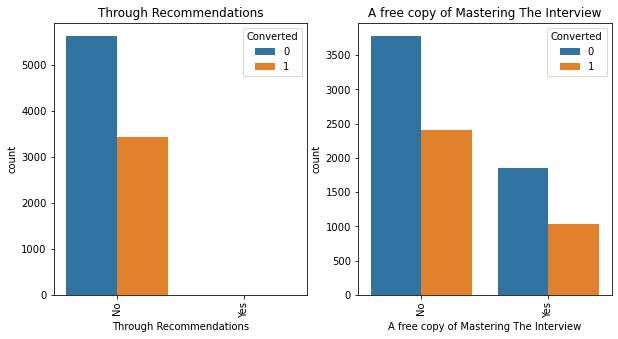

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

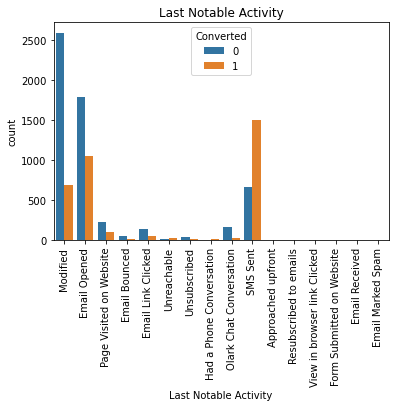

In [48]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Education_Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

##### Heatmap to see correlation between variables

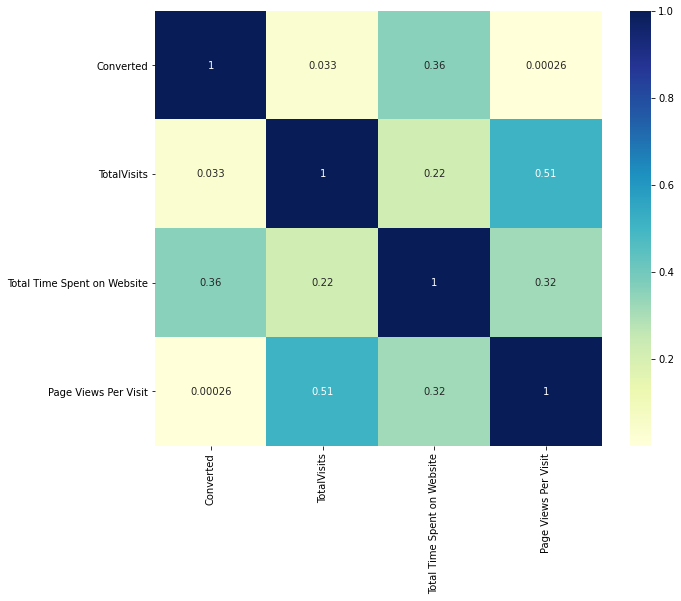

In [49]:
# Checking correlations among variables

plt.figure(figsize = (10, 8))
sns.heatmap(Education_Lead_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above EDA, it is understandable that there are many elements with less data and hence will be less relevant to our analysis

In [50]:
# Checking percentile values for "Total Visits"

Education_Lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

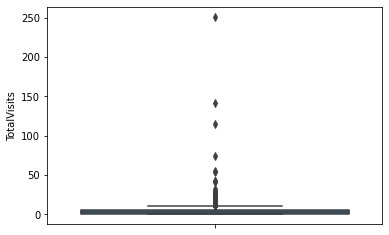

In [51]:
# Visualizing spread of variable, Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y = Education_Lead_data['TotalVisits'])
plt.show()

We can see the presence of outliers.

In [52]:
# Checking percentiles for "Total Time Spent on Website"

Education_Lead_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

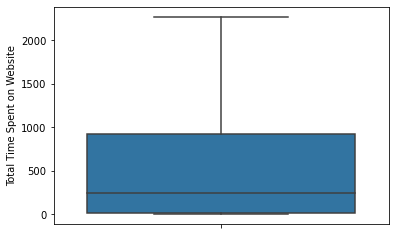

In [53]:
# Visualizing spread of variable, Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y = Education_Lead_data['Total Time Spent on Website'])
plt.show()

We can see that there are no major Outliers for the variable, Total Time Spent on Website. Hence, we do not perform any Outlier Treatment for this column.

In [54]:
# Checking percentiles for "Page Views Per Visit"

Education_Lead_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

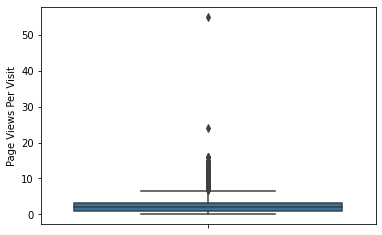

In [55]:
# Visualizing spread of numeric variable, 

plt.figure(figsize=(6,4))
sns.boxplot(y = Education_Lead_data['Page Views Per Visit'])
plt.show()

We can see presence of outliers in the variable, TotalVisits

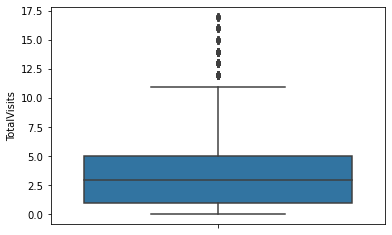

In [56]:
#Outlier Treatment: Remove top & bottom : 1% of the Column Outlier values

Q3 = Education_Lead_data.TotalVisits.quantile(0.99)
Education_Lead_data = Education_Lead_data[(Education_Lead_data.TotalVisits <= Q3)]
Q1 = Education_Lead_data.TotalVisits.quantile(0.01)
Education_Lead_data = Education_Lead_data[(Education_Lead_data.TotalVisits >= Q1)]
sns.boxplot(y=Education_Lead_data['TotalVisits'])
plt.show()


In [57]:
Education_Lead_data.shape

(8991, 23)

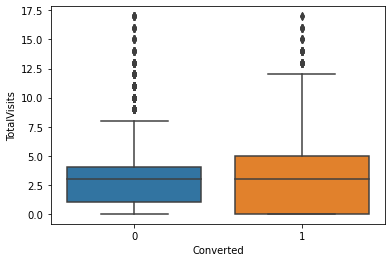

In [58]:
# Visualizing count of Variables, TotalVisits based on Converted value

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Education_Lead_data)
plt.show()

The median for both Converted and non-coverted are the same. There is nothing that can be specifically confirm for lead conversion from Total Visits

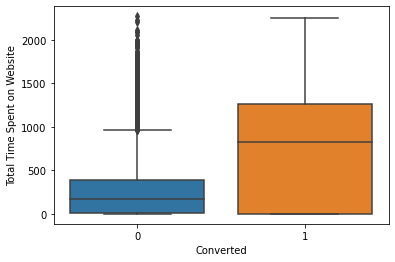

In [59]:
# Visualizing count of Variables, TotalVisits based on Converted value

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Education_Lead_data)
plt.show()

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

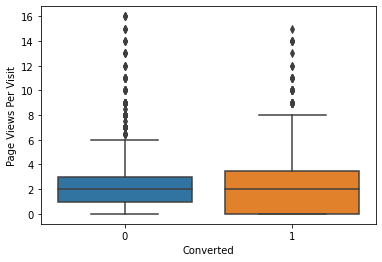

In [60]:
# Visualizing count of Variables, TotalVisits based on Converted value

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Education_Lead_data)
plt.show()

The median for both Converted and non-coverted are the same. There is nothing that can be specifically confirm for lead conversion from Page Views Per Visit.

In [61]:
# Inspecting missing values for the leftover columns

round(100*(Education_Lead_data.isnull().sum()/len(Education_Lead_data.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

There are no missing values in the columns to be analyzed further.

### Data Preparation

##### Dummy variables

Creating Dummy variables for the categorical variables* 

In [62]:
Education_Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

In [63]:
# Retrieving the categorical variables

cat_columns= Education_Lead_data.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

For the categorical variable, Country, the number of values for 'India' are quite high (nearly 97% of the Data). Hence this column can be dropped. Similarly, we can drop "Tags", as tags variable is generated by the sales team after the disscussion with student otherwise it will increase the model accuracy .

In [64]:
#list of columns to be dropped

columns_to_drop=['Country','Tags']

In [65]:
# Dropping columns
Education_Lead_data = Education_Lead_data.drop(columns_to_drop,1)
Education_Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [66]:
# Retrieving the categorical variables after dropping the variables

cat_columns= Education_Lead_data.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [67]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(Education_Lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe

Education_Lead_data_dum = pd.concat([Education_Lead_data, dummy], axis=1)
Education_Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Lets drop the orginal columns, as we have created dummy variables for them

Education_Lead_data_dum = Education_Lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Education_Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
print('Information of Data')
print(f'{Education_Lead_data_dum.info()}', end="\n\n")

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8991 non-null   int64  
 1   TotalVisits                                           8991 non-null   float64
 2   Total Time Spent on Website                           8991 non-null   int64  
 3   Page Views Per Visit                                  8991 non-null   float64
 4   Lead Origin_Landing Page Submission                   8991 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8991 non-null   uint8  
 6   Lead Origin_Lead Import                               8991 non-null   uint8  
 7   Specialization_Business Administration                8991 non-null   uint8  
 8   Specialization_E-Business             

In [70]:
# Overview of Dataframe (Shape)

print(f'Shape of Data: {Education_Lead_data_dum.shape}', end="\n\n")

Shape of Data: (8991, 82)



In [71]:
# Overview of Dataframe (Description, % of NaN) 

print('Description of Data')
print(f'{Education_Lead_data_dum.describe()}', end="\n\n")

Description of Data
         Converted  TotalVisits  Total Time Spent on Website  \
count  8991.000000  8991.000000                  8991.000000   
mean      0.378045     3.217106                   481.305973   
std       0.484926     2.989530                   544.883763   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     9.000000   
50%       0.000000     3.000000                   245.000000   
75%       1.000000     5.000000                   919.500000   
max       1.000000    17.000000                  2272.000000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           8991.000000                          8991.000000   
mean               2.344587                             0.535980   
std                2.061548                             0.498731   
min                0.000000                             0.000000   
25%                1.000000                             0.00000

In [72]:
# Calculating the percentage (%) of null values

print('Percentage of null values per column')
round(100*(Education_Lead_data_dum.isnull().sum())/len(Education_Lead_data.index),2)

Percentage of null values per column


Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Lead Origin_Landing Page Submission                   0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 82, dtype: float64

### Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [73]:
import sklearn

from sklearn.model_selection import train_test_split

# Putting response variable to y
y = Education_Lead_data_dum['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
X=Education_Lead_data_dum.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [76]:
print(X_train.shape)
print(X_test.shape)

(6293, 81)
(2698, 81)


#### Rescaling the features using MinMax Scaler

In [77]:
# Defining a variable scaler for minmax scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 1467 to 5803
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6293 non-null   float64
 1   Total Time Spent on Website                           6293 non-null   int64  
 2   Page Views Per Visit                                  6293 non-null   float64
 3   Lead Origin_Landing Page Submission                   6293 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6293 non-null   uint8  
 5   Lead Origin_Lead Import                               6293 non-null   uint8  
 6   Specialization_Business Administration                6293 non-null   uint8  
 7   Specialization_E-Business                             6293 non-null   uint8  
 8   Specialization_E-COMMERCE                             6

In [79]:
# Retrieving the numerical variables

num_columns= X_train.select_dtypes(include=['int64','float64']).columns
num_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [80]:
# Apply scaler() to all the numerical variables

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

In [81]:
X_train[num_columns].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1467,0.235294,0.393486,0.25000
108,0.352941,0.175176,0.18750
7858,0.647059,0.055458,0.07625
5220,0.000000,0.000000,0.00000
3871,0.000000,0.000000,0.00000


In [82]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


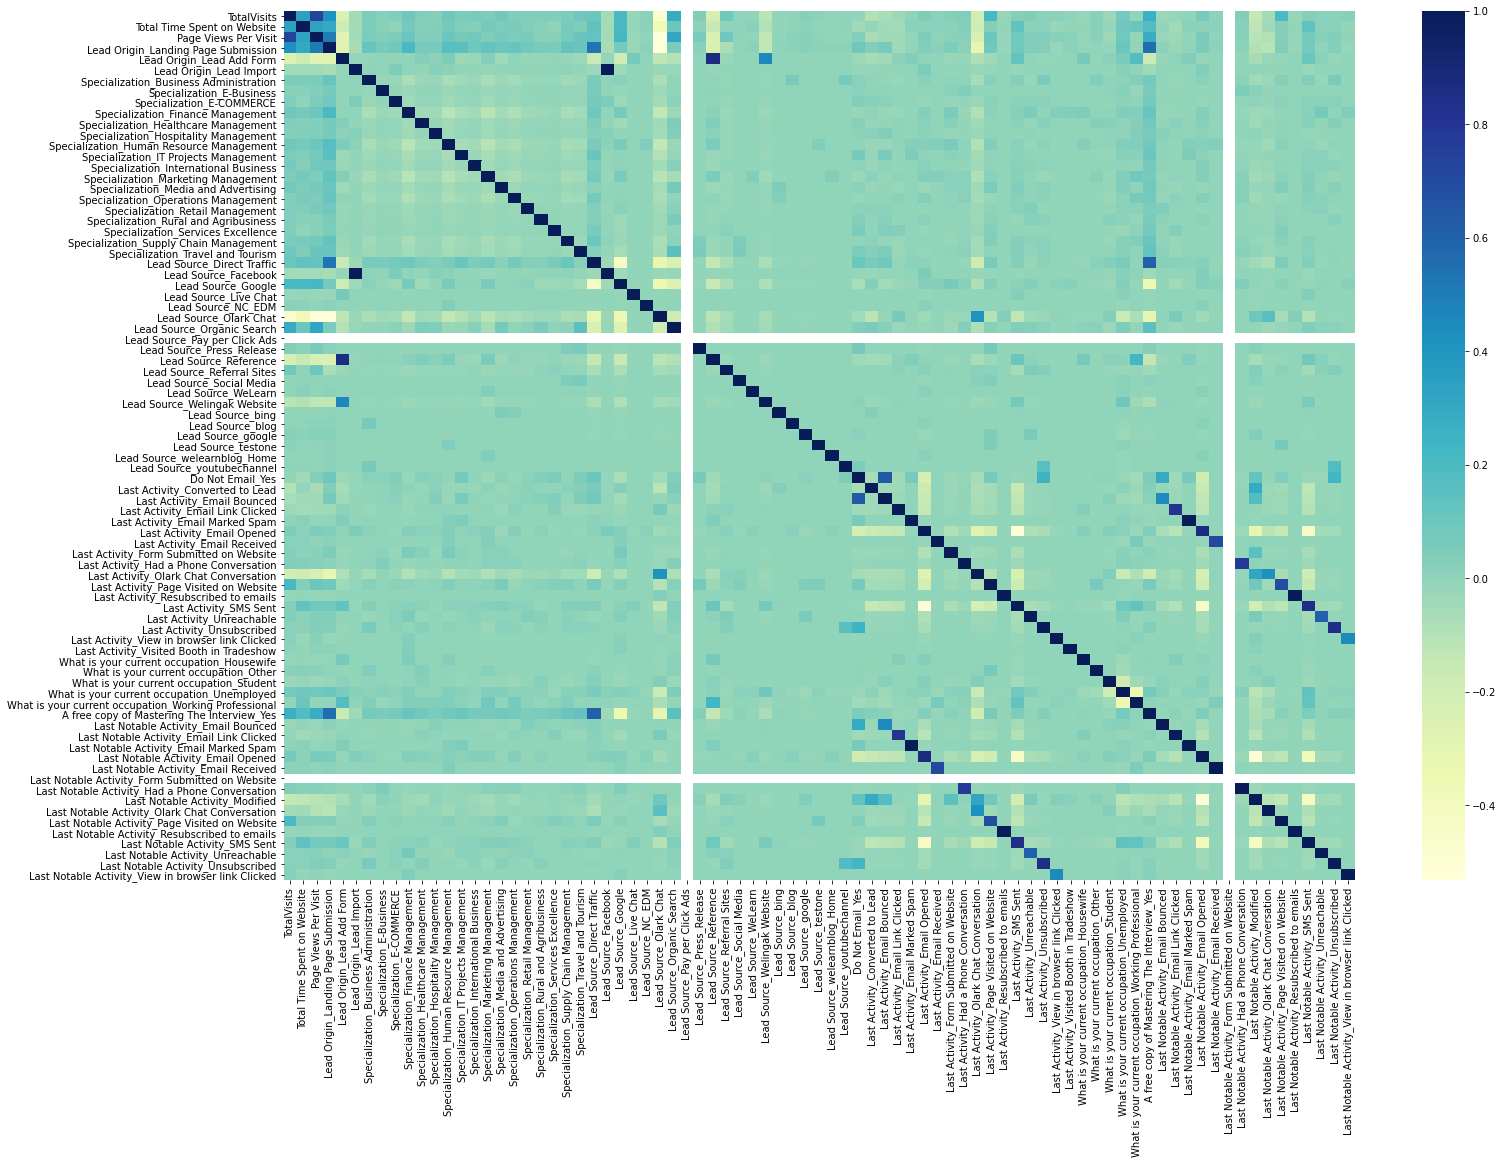

In [83]:
# Visualizing the correlation between all set of usable columns

plt.figure(figsize=(24, 16))
sns.heatmap(X_train.corr(), cmap="YlGnBu")
plt.show()

###  Building Model using Logistic Regression

In [84]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
# Import RFE

from sklearn.feature_selection import RFE

In [86]:
# Running RFE with 20 variables as output

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [87]:
# Creating a list of features selected by RFE

rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,TotalVisits,True,1
73,Last Notable Activity_Modified,True,1
25,Lead Source_Google,True,1
74,Last Notable Activity_Olark Chat Conversation,True,1
23,Lead Source_Direct Traffic,True,1
...,...,...,...
5,Lead Origin_Lead Import,False,58
11,Specialization_Hospitality Management,False,59
37,Lead Source_bing,False,60
30,Lead Source_Pay per Click Ads,False,61


In [88]:
# Creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [89]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Re

#### Building model using statsmodel, for the detailed statistics

In [90]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
1467,0.235294,0.393486,0.25000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
108,0.352941,0.175176,0.18750,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7858,0.647059,0.055458,0.07625,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
X_train_rfe.shape

(6293, 20)

In [92]:
# Importing statsmodels

import statsmodels.api as sm

##### Creating a generalised function for evaluating Variance Inflation Factor

In [93]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_df(local_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


#### BUILDING MODEL #1

In [94]:
# Adding a constant variable 

X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
#res = logm1.fit()
logm1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.9
Date:                Tue, 18 Oct 2022   Deviance:                       5011.7
Time:                        18:31:42   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3332      0.121     -2.761      0.006      -0.570      -0.097
TotalVisits                                              1.6794      0.304      5.527      0.000       1.084       2.275
Total Time Spent on Website                              4.6396      0.172     27.019      0.000       4.303       4.976
Page Views Per Visit                                    -1.4283      0.431     -3.313      0.001      -2.273      -0.583
Lead Origin_Lead Add Form                                2.7772      0.264     10.533      0.000       2.260       3.294
Lead Source_Direct Traffic                              -1.6810      0.134    -12.555      0.000      -1.943      -1.419
Lead Source_Google                                      -1.2843      0.132     -9.744      0.000      -1.543      -1.026
Lead Source_Organic Search                              -1.4902      0.163     -9.123      0.000      -1.810      -1.170
Lead Source_Referral Sites                              -1.4269      0.364     -3.917      0.000      -2.141      -0.713
Lead Source_Welingak Website                             2.3494      1.046      2.245      0.025       0.299       4.400
Do Not Email_Yes                                        -1.7942      0.178    -10.081      0.000      -2.143      -1.445
Last Activity_Olark Chat Conversation                   -1.1525      0.195     -5.913      0.000      -1.535      -0.770
What is your current occupation_Housewife               23.7780   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
What is your current occupation_Student                  1.1484      0.240      4.793      0.000       0.679       1.618
What is your current occupation_Unemployed               1.0738      0.089     12.101      0.000       0.900       1.248
What is your current occupation_Working Professional     3.6212      0.203     17.868      0.000       3.224       4.018
Last Notable Activity_Email Link Clicked                -1.8309      0.263     -6.973      0.000      -2.346      -1.316
Last Notable Activity_Email Opened                      -1.4716      0.091    -16.194      0.000      -1.650      -1.294
Last Notable Activity_Modified                          -1.7900      0.100    -17.942      0.000      -1.986      -1.594
Last Notable Activity_Olark Chat Conversation           -1.8074      0.398     -4.545      0.000      -2.587      -1.028
Last Notable Activity_Page Visited on Website           -1.8006      0.222     -8.110      0.000      -2.236      -1.365
========================================================================================================================
"""

In [95]:
# Checking VIF, Variance Inflation Factor 

vif_df(X_train_sm)

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.82
4,Lead Source_Direct Traffic,3.34
13,What is your current occupation_Unemployed,2.73
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
17,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
16,Last Notable Activity_Email Opened,1.74


#### The VIF values seem to be fine. Dropping feature,'What is your current occupation_Housewife' coz it has high p-value : 0.999, which is greater than 0.05.

In [96]:
X_train_rfe.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
1467,0.235294,0.393486,0.25000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
108,0.352941,0.175176,0.18750,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
7858,0.647059,0.055458,0.07625,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### BUILDING MODEL #2

In [97]:
# Refit the model with the new set of features

# Adding a constant variable 

X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

logm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.7
Date:                Tue, 18 Oct 2022   Deviance:                       5021.4
Time:                        18:31:42   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3248      0.120     -2.696      0.007      -0.561      -0.089
TotalVisits                                              1.6719      0.304      5.507      0.000       1.077       2.267
Total Time Spent on Website                              4.6339      0.171     27.026      0.000       4.298       4.970
Page Views Per Visit                                    -1.4364      0.431     -3.335      0.001      -2.281      -0.592
Lead Origin_Lead Add Form                                2.8374      0.264     10.766      0.000       2.321       3.354
Lead Source_Direct Traffic                              -1.6737      0.134    -12.515      0.000      -1.936      -1.412
Lead Source_Google                                      -1.2758      0.132     -9.691      0.000      -1.534      -1.018
Lead Source_Organic Search                              -1.4731      0.163     -9.033      0.000      -1.793      -1.153
Lead Source_Referral Sites                              -1.4202      0.364     -3.902      0.000      -2.134      -0.707
Lead Source_Welingak Website                             2.2948      1.046      2.193      0.028       0.244       4.346
Do Not Email_Yes                                        -1.7952      0.178    -10.083      0.000      -2.144      -1.446
Last Activity_Olark Chat Conversation                   -1.1514      0.195     -5.910      0.000      -1.533      -0.770
What is your current occupation_Student                  1.1317      0.240      4.724      0.000       0.662       1.601
What is your current occupation_Unemployed               1.0583      0.088     11.989      0.000       0.885       1.231
What is your current occupation_Working Professional     3.6050      0.202     17.807      0.000       3.208       4.002
Last Notable Activity_Email Link Clicked                -1.8104      0.260     -6.963      0.000      -2.320      -1.301
Last Notable Activity_Email Opened                      -1.4662      0.091    -16.149      0.000      -1.644      -1.288
Last Notable Activity_Modified                          -1.7904      0.100    -17.953      0.000      -1.986      -1.595
Last Notable Activity_Olark Chat Conversation           -1.8080      0.397     -4.549      0.000      -2.587      -1.029
Last Notable Activity_Page Visited on Website           -1.7993      0.222     -8.109      0.000      -2.234      -1.364
========================================================================================================================
"""

In [98]:
# Checking VIF, Variance Inflation Factor 

vif_df(X_train_sm)

,Features,VIF
2,Page Views Per Visit,6.18
0,TotalVisits,5.51
5,Lead Source_Google,3.81
4,Lead Source_Direct Traffic,3.34
12,What is your current occupation_Unemployed,2.72
6,Lead Source_Organic Search,2.55
1,Total Time Spent on Website,2.34
16,Last Notable Activity_Modified,2.26
10,Last Activity_Olark Chat Conversation,1.76
15,Last Notable Activity_Email Opened,1.73


In [99]:
# Column 'Page Views Per Visit' has a very VIF(6.18). Hence dropping the feature'Page Views Per Visit' as all the p-values are < 0.05

X_train_rfe = X_train_rfe.drop(['Page Views Per Visit'], axis=1)
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
1467,0.235294,0.393486,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
108,0.352941,0.175176,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
7858,0.647059,0.055458,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5220,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3871,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### BUILDING MODEL # 3

In [100]:
# Refit the model with the new set of features

# Adding a constant variable 

X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
 
logm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.3
Date:                Tue, 18 Oct 2022   Deviance:                       5032.6
Time:                        18:31:42   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3498      0.120     -2.913      0.004      -0.585      -0.114
TotalVisits                                              1.0910      0.248      4.393      0.000       0.604       1.578
Total Time Spent on Website                              4.6218      0.171     27.009      0.000       4.286       4.957
Lead Origin_Lead Add Form                                2.8433      0.264     10.789      0.000       2.327       3.360
Lead Source_Direct Traffic                              -1.7881      0.129    -13.823      0.000      -2.042      -1.535
Lead Source_Google                                      -1.3991      0.126    -11.071      0.000      -1.647      -1.151
Lead Source_Organic Search                              -1.6362      0.155    -10.532      0.000      -1.941      -1.332
Lead Source_Referral Sites                              -1.5811      0.362     -4.364      0.000      -2.291      -0.871
Lead Source_Welingak Website                             2.2962      1.046      2.194      0.028       0.245       4.347
Do Not Email_Yes                                        -1.8073      0.178    -10.169      0.000      -2.156      -1.459
Last Activity_Olark Chat Conversation                   -1.1418      0.195     -5.858      0.000      -1.524      -0.760
What is your current occupation_Student                  1.1304      0.240      4.715      0.000       0.661       1.600
What is your current occupation_Unemployed               1.0604      0.088     12.026      0.000       0.888       1.233
What is your current occupation_Working Professional     3.5963      0.202     17.783      0.000       3.200       3.993
Last Notable Activity_Email Link Clicked                -1.7718      0.259     -6.844      0.000      -2.279      -1.264
Last Notable Activity_Email Opened                      -1.4492      0.090    -16.019      0.000      -1.627      -1.272
Last Notable Activity_Modified                          -1.7698      0.099    -17.818      0.000      -1.964      -1.575
Last Notable Activity_Olark Chat Conversation           -1.7450      0.394     -4.425      0.000      -2.518      -0.972
Last Notable Activity_Page Visited on Website           -1.6582      0.216     -7.682      0.000      -2.081      -1.235
========================================================================================================================
"""

In [101]:
# Checking VIF, Variance Inflation Factor 

vif_df(X_train_sm)

,Features,VIF
0,TotalVisits,3.64
4,Lead Source_Google,3.39
3,Lead Source_Direct Traffic,3.01
11,What is your current occupation_Unemployed,2.72
1,Total Time Spent on Website,2.34
15,Last Notable Activity_Modified,2.26
5,Lead Source_Organic Search,2.25
9,Last Activity_Olark Chat Conversation,1.76
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.64


#### From the Model Summary Report we can say that all the p-values of respective features are well under control, below 0.05 and seems to be significant.
#### We can also see that all the features under VIF table are well under control as there seems to be VERY LOW Multicollinearity between the predictors.
#### So we can fix the features available for our model

## MAKING PREDICTIONS

In [102]:
# Predicting the probabilities on the train set

y_train_pred = logm3.predict(X_train_sm)
y_train_pred[:10]


1467    0.980598
108     0.031040
7858    0.568027
5220    0.413438
3871    0.141974
686     0.590309
1694    0.107208
2180    0.034062
6845    0.141974
191     0.068484
dtype: float64

In [103]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98059818, 0.03104002, 0.56802738, 0.413438  , 0.14197437,
       0.5903089 , 0.10720845, 0.03406225, 0.14197437, 0.06848407])

In [104]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,1,0.980598
1,0,0.031040
2,1,0.568027
3,1,0.413438
4,0,0.141974


In [105]:
#Prediction made with probability cut off of 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Probability,Predicted
0,1,0.980598,1
1,0,0.031040,0
2,1,0.568027,1
3,1,0.413438,0
4,0,0.141974,0


### Model Evaluation

In [106]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [107]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [108]:
# Let's check the overall accuracy.

print('Overall Accuracy using the train set : ' , 
      metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Overall Accuracy using the train set :  0.8221833783569045


##### The overall accuracy is 82% which is a very good value

In [109]:
# Substituting the value of true positive

TP = confusion[1,1]

# Substituting the value of true negatives

TN = confusion[0,0]

# Substituting the value of false positives

FP = confusion[0,1] 

# Substituting the value of false negatives

FN = confusion[1,0]

In [110]:
# Let's see the sensitivity of our logistic regression model

print('Overall Sensitivity using the train set : ' ,(TP/float(TP+FN)))

Overall Sensitivity using the train set :  0.7068018588931136


In [111]:
# Let us calculate specificity

print('Overall Specificity using the train set : ',(TN / float(TN+FP)))

Overall Specificity using the train set :  0.89174732552216


##### With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 71% and specificity of around 89%.

In [112]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print('False Postive Rate : ' ,(FP/ float(TN+FP)))

False Postive Rate :  0.10825267447784004


In [113]:
# positive predictive value 

print('positive predictive value ', (TP / float(TP+FP)))

positive predictive value  0.7974261201143946


In [114]:
# Negative predictive value

print('Negative predictive value', (TN / float(TN+ FN)))

Negative predictive value 0.834564958283671


## Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [115]:
# ROC function for plotting ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

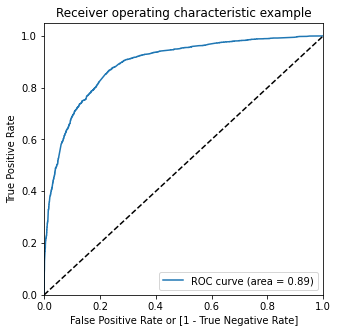

In [117]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

##### The ROC Curve should be a value close to 1. We are getting a good value of 0.89 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [118]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.621325,0.967047,0.412888
0.2,0.2,0.772287,0.913815,0.686959
0.3,0.3,0.804863,0.865230,0.768467
0.4,0.4,0.815509,0.773131,0.841060
0.5,0.5,0.822183,0.706802,0.891747
0.6,0.6,0.811378,0.625264,0.923586
0.7,0.7,0.784205,0.506548,0.951605
0.8,0.8,0.766089,0.428390,0.969689
0.9,0.9,0.720483,0.275454,0.988793


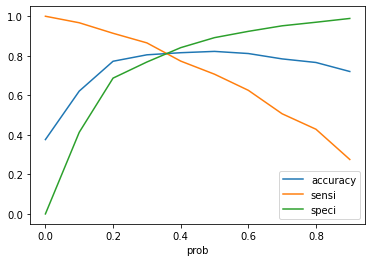

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cut off probability.

In [121]:
#Prediction made with probability cut off of 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [122]:
# Let's check the overall accuracy.

print('Overall Accuracy using the train set : ' , 
      metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Overall Accuracy using the train set :  0.8102653742253297


In [123]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3200,  726],
       [ 468, 1899]], dtype=int64)

In [124]:
# Substituting the value of true positive

TP = confusion2[1,1]

# Substituting the value of true negatives

TN = confusion2[0,0]

# Substituting the value of false positives

FP = confusion2[0,1] 

# Substituting the value of false negatives

FN = confusion2[1,0]

In [125]:
# Let's see the sensitivity of our logistic regression model

print('Overall Sensitivity using the train set : ' ,(TP / float(TP+FN)))

Overall Sensitivity using the train set :  0.8022813688212928


In [126]:
# Let us calculate specificity of our logistic regression model

print('Overall Specificity using the train set : ',(TN/(TN+FP)))

Overall Specificity using the train set :  0.8150789607743251


##### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.89, which is very good. We have the following values for the Train Data:

Accuracy : 81.02 %

Sensitivity : 80.22 %

Specificity : 82.00%

## PREDICTION ON TEST SET


In [127]:
#Scaling numeric values

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test[num_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8692,0.176471,0.133803,0.09375
6126,0.000000,0.000000,0.00000
5198,0.176471,0.187060,0.09375
4979,0.235294,0.378961,0.25000
9225,0.117647,0.032570,0.12500


In [128]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 8692 to 976
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2698 non-null   float64
 1   Total Time Spent on Website                           2698 non-null   float64
 2   Page Views Per Visit                                  2698 non-null   float64
 3   Lead Origin_Landing Page Submission                   2698 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2698 non-null   uint8  
 5   Lead Origin_Lead Import                               2698 non-null   uint8  
 6   Specialization_Business Administration                2698 non-null   uint8  
 7   Specialization_E-Business                             2698 non-null   uint8  
 8   Specialization_E-COMMERCE                             26

In [129]:
# Substituting all the columns in the final train model

col = X_train_rfe.columns

In [130]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,1.0,0.176471,0.133803,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6126,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5198,1.0,0.176471,0.187060,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4979,1.0,0.235294,0.378961,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9225,1.0,0.117647,0.032570,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1.0,0.117647,0.657570,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3978,1.0,0.117647,0.161532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7402,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1205,1.0,1.000000,0.300176,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [131]:
# Predicting Test Data Using Developed Model

y_test_pred = logm3.predict(X_test_sm)
y_test_pred

8692    0.433761
6126    0.972184
5198    0.073782
4979    0.746984
9225    0.012424
          ...   
893     0.670239
3978    0.220468
7402    0.338820
1205    0.248110
976     0.002775
Length: 2698, dtype: float64

In [132]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [133]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,0,0.433761,1
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0
...,...,...,...
2693,0,0.670239,1
2694,1,0.220468,0
2695,0,0.338820,0
2696,0,0.248110,0


In [134]:
# Check the overall accuracy

print('Overall Accuracy using the train set : ', metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted']))

Overall Accuracy using the train set :  0.8042994810971089


In [135]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1344,  322],
       [ 206,  826]], dtype=int64)

In [136]:
# Substituting the value of true positive

TP = confusion2[1,1]

# Substituting the value of true negatives

TN = confusion2[0,0]

# Substituting the value of false positives

FP = confusion2[0,1] 

# Substituting the value of false negatives

FN = confusion2[1,0]

In [137]:
# Calculating the sensitivity

print('Overall Sensitivity using the train set : ' ,(TP/float(TP+FN)))

Overall Sensitivity using the train set :  0.8003875968992248


In [138]:
# Calculating the Specifity

print('Overall Specificity using the train set : ',(TN/(TN+FP)))

Overall Specificity using the train set :  0.8067226890756303


With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision-Recall


In [139]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3501,  425],
       [ 694, 1673]], dtype=int64)

In [140]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7974261201143946

In [141]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7068018588931136

With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

With the current cut off as 0.44 we have Precision around 72% and Recall around 80% and accuracy 82 

## Precision and recall tradeoff

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6288    0
 6289    1
 6290    0
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

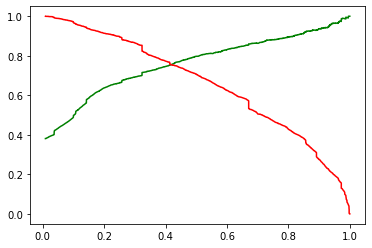

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [146]:
# Making prediction using cut off 0.41

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.980598,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.031040,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.568027,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.413438,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.141974,0,1,1,0,0,0,0,0,0,0,0,0


In [147]:
# Check the overall accuracy

print('Overall Accuracy using the train set : ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Overall Accuracy using the train set :  0.8167805498172572


In [148]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3321,  605],
       [ 548, 1819]], dtype=int64)

In [149]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7195121951219512

In [150]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8003875968992248

With the current cut off as 0.41 we have Precision around 72% and Recall around 80% and accuracy 82 %.

## Prediction on Test set

In [151]:

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm3.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.433761
1,1,0.972184
2,1,0.073782
3,1,0.746984
4,0,0.012424


In [152]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.433761,1
1,1,0.972184,1
2,1,0.073782,0
3,1,0.746984,1
4,0,0.012424,0
...,...,...,...
2693,0,0.670239,1
2694,1,0.220468,0
2695,0,0.338820,0
2696,0,0.248110,0


In [153]:
# Check the overall accuracy

print('Overall Accuracy using the train set : ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Overall Accuracy using the train set :  0.8167805498172572


In [154]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1379,  287],
       [ 240,  792]], dtype=int64)

In [155]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [156]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7340129749768304

In [157]:

#Recall = TP / TP + FN
TP / (TP + FN)

0.7674418604651163

With the current cut off as 0.41 we have Precision around 73% , Recall around 77% and accuracy 82%.

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model



### Conclusion:

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

##### TotalVisits

##### Lead Source_Google

##### Lead Source_Direct Traffic

##### What is your current occupation_Unemployed	

##### Total Time Spent on Website	

##### Last Notable Activity_Modified

##### Lead Source_Organic Search	

##### Last Activity_Olark Chat Conversation

##### Last Notable Activity_Email Opened	

##### Lead Origin_Lead Add Form

##### Last Notable Activity_Olark Chat Conversation

##### What is your current occupation_Working Professional

##### Lead Source_Welingak Website

##### Do Not Email_Yes	

##### Last Notable Activity_Page Visited on Website

##### Lead Source_Referral Sites

##### What is your current occupation_Student

##### Last Notable Activity_Email Link Clicked

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.
